# Toronto Vehicle Serious Collision Victims Evaluation


---


**Author**: Group 1

**Creation Date**: November 14, 2021

**Revision Date**: November 14, 2021


---


**Data Source**: Toronto Police Service: Public Safety Data Portal

**Data**: https://data.torontopolice.on.ca/datasets/ksi/

**Data Dictionary**: https://torontops.maps.arcgis.com/sharing/rest/content/items/c0b17f1888544078bf650f3b8b04d35d/data 

**Data Licence**: See below for full data licence details.

---



The data captures information about serious vehicle collisions in the city of Toronto Ontario.

This notebook will prepare the data for analysis.



Note: In order to run this code you will need to create a shortcut to the shared drive in your Google drive and specify the path to the shortcut in the file_path variable.

# Importing Data Set and Other Configurations

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from datetime import date, datetime
from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Main paths and file names
file_path = '/content/drive/MyDrive/Data Files/'  #Pay attention to the needed shortcut in Google Drive

# Input file
file_people = 'KSI_People.csv'

In [4]:
# Importing Individual Involved Person Data
file_people = pd.read_csv(file_path + file_people, index_col='INDEX_')
file_people['DATE_TIME'] = pd.to_datetime(file_people['DATE_TIME'])
file_people.head()

,DATE_TIME,SEASON,YEAR,MONTH,MONTH_NAME,DAY_NAME,HOUR,HOUR_INTERVAL,ACCNUM,INVTYPE,INVAGE,INJURY,DISTRICT,NEIGHBOURHOOD,VEHTYPE,VEHICLE_CATEGORY,ALCOHOL
INDEX_,,,,,,,,,,,,,,,,,
3387730,2006-03-11 08:52:00,Winter,2006,3,March,Saturday,8,08:00 to 08:59,892658,Driver,unknown,None,Toronto and East York,High Park North (88),"Automobile, Station Wagon",Automobile,<Null>
3387731,2006-03-11 08:52:00,Winter,2006,3,March,Saturday,8,08:00 to 08:59,892658,Pedestrian,65 to 69,Fatal,Toronto and East York,High Park North (88),Other,Other,<Null>
3388101,2006-03-11 09:15:00,Winter,2006,3,March,Saturday,9,09:00 to 09:59,892810,Motorcycle Driver,45 to 49,Fatal,Scarborough,Rouge (131),Motorcycle,Recreational,<Null>
3388102,2006-03-11 09:15:00,Winter,2006,3,March,Saturday,9,09:00 to 09:59,892810,Driver,unknown,None,Scarborough,Rouge (131),"Automobile, Station Wagon",Automobile,<Null>
3387793,2006-03-12 02:40:00,Winter,2006,3,March,Sunday,2,02:00 to 02:59,892682,Driver,25 to 29,None,Scarborough,Eglinton East (138),"Automobile, Station Wagon",Automobile,Yes


In [5]:
# Looking at the obtained data
file_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16860 entries, 3387730 to 81509748
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE_TIME         16860 non-null  datetime64[ns]
 1   SEASON            16860 non-null  object        
 2   YEAR              16860 non-null  int64         
 3   MONTH             16860 non-null  int64         
 4   MONTH_NAME        16860 non-null  object        
 5   DAY_NAME          16860 non-null  object        
 6   HOUR              16860 non-null  int64         
 7   HOUR_INTERVAL     16860 non-null  object        
 8   ACCNUM            16860 non-null  int64         
 9   INVTYPE           16860 non-null  object        
 10  INVAGE            16860 non-null  object        
 11  INJURY            16860 non-null  object        
 12  DISTRICT          16860 non-null  object        
 13  NEIGHBOURHOOD     16860 non-null  object        
 14  VEHTYPE      

# Fatal Victims Dataframe

In [6]:
# Filtering fatal victims
fatal_victims = file_people[file_people['INJURY'] == 'Fatal']
fatal_victims

,DATE_TIME,SEASON,YEAR,MONTH,MONTH_NAME,DAY_NAME,HOUR,HOUR_INTERVAL,ACCNUM,INVTYPE,INVAGE,INJURY,DISTRICT,NEIGHBOURHOOD,VEHTYPE,VEHICLE_CATEGORY,ALCOHOL
INDEX_,,,,,,,,,,,,,,,,,
3387731,2006-03-11 08:52:00,Winter,2006,3,March,Saturday,8,08:00 to 08:59,892658,Pedestrian,65 to 69,Fatal,Toronto and East York,High Park North (88),Other,Other,<Null>
3388101,2006-03-11 09:15:00,Winter,2006,3,March,Saturday,9,09:00 to 09:59,892810,Motorcycle Driver,45 to 49,Fatal,Scarborough,Rouge (131),Motorcycle,Recreational,<Null>
3387795,2006-03-12 02:40:00,Winter,2006,3,March,Sunday,2,02:00 to 02:59,892682,Pedestrian,40 to 44,Fatal,Scarborough,Eglinton East (138),Other,Other,Yes
3389259,2006-03-15 15:35:00,Winter,2006,3,March,Wednesday,15,15:00 to 15:59,893251,Pedestrian,20 to 24,Fatal,Etobicoke York,Kingsview Village-The Westway (6),Other,Other,<Null>
3416416,2006-05-17 18:10:00,Spring,2006,5,May,Wednesday,18,18:00 to 18:59,903449,Pedestrian,0 to 4,Fatal,North York,York University Heights (27),Other,Other,<Null>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81431665,2020-07-26 21:19:00,Summer,2020,7,July,Sunday,21,21:00 to 21:59,1393549,Pedestrian,25 to 29,Fatal,North York,Clanton Park (33),<Null>,Null,<Null>
81431840,2020-07-28 07:00:00,Summer,2020,7,July,Tuesday,7,07:00 to 07:59,1402441,Pedestrian,80 to 84,Fatal,Etobicoke York,Mimico (17),<Null>,Null,<Null>
81431842,2020-08-11 11:09:00,Summer,2020,8,August,Tuesday,11,11:00 to 11:59,1501323,Pedestrian,0 to 4,Fatal,Etobicoke York,Islington-City Centre West (14),<Null>,Null,<Null>


#Age Group Analysis

In [7]:
# Filtering age group attribute of fatal victims
# Note: 2 unknown INVAGE rows were dropped
age_fatal = fatal_victims.groupby('INVAGE')['INJURY'].size()
age_order = ['0 to 4','5 to 9','10 to 14','15 to 19','20 to 24','25 to 29',
                   '30 to 34','35 to 39','40 to 44','45 to 49','50 to 54',
                   '55 to 59','60 to 64','65 to 69','70 to 74','75 to 79',
                   '80 to 84','85 to 89','90 to 94']#,'unknown']
age_fatal = age_fatal.reindex(age_order)
age_fatal

INVAGE
0 to 4       5
5 to 9      11
10 to 14     4
15 to 19    39
20 to 24    64
25 to 29    65
30 to 34    53
35 to 39    43
40 to 44    45
45 to 49    37
50 to 54    41
55 to 59    63
60 to 64    45
65 to 69    49
70 to 74    60
75 to 79    58
80 to 84    60
85 to 89    50
90 to 94    21
Name: INJURY, dtype: int64

## Analysis 1

In [8]:
# Distribution of age groups among fatal victims set
age_distribution_perc = ((age_fatal / age_fatal.sum())*100).sort_values(ascending=False)
age_distribution_perc

INVAGE
25 to 29    7.995080
20 to 24    7.872079
55 to 59    7.749077
80 to 84    7.380074
70 to 74    7.380074
75 to 79    7.134071
30 to 34    6.519065
85 to 89    6.150062
65 to 69    6.027060
60 to 64    5.535055
40 to 44    5.535055
35 to 39    5.289053
50 to 54    5.043050
15 to 19    4.797048
45 to 49    4.551046
90 to 94    2.583026
5 to 9      1.353014
0 to 4      0.615006
10 to 14    0.492005
Name: INJURY, dtype: float64

In [9]:
# Looking at above result, we will filter only the 9 highest values + others
age_distribution_comp = age_fatal.sort_values(ascending=False)[:9]
result = age_fatal.sort_values(ascending=False)[9:].sum()
age_distribution_comp.loc['Others'] = result
age_distribution_comp

INVAGE
25 to 29     65
20 to 24     64
55 to 59     63
80 to 84     60
70 to 74     60
75 to 79     58
30 to 34     53
85 to 89     50
65 to 69     49
Others      291
Name: INJURY, dtype: int64

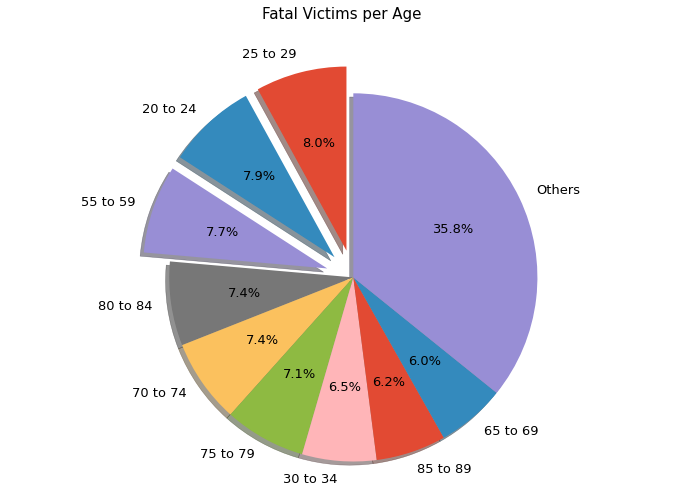

In [10]:
# Plotting
explode = (0.15, 0.15, 0.15, 0, 0, 0, 0, 0, 0, 0) 
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(age_distribution_comp, explode=explode, labels=age_distribution_comp.index.to_list(),
        autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 13})
ax1.axis('equal')
plt.title("Fatal Victims per Age", y=1.05, size=15)
plt.show()

##Analysis 2

In [11]:
# Comparing to the total number of people involved in all collisions
age_total = file_people.groupby('INVAGE')['INJURY'].size()
age_total = age_total.reindex(age_order)
age_relative_comp = (100*age_fatal/age_total).round(2)
age_relative_comp

INVAGE
0 to 4       2.99
5 to 9       6.01
10 to 14     1.73
15 to 19     5.09
20 to 24     4.10
25 to 29     4.32
30 to 34     4.25
35 to 39     3.57
40 to 44     3.81
45 to 49     3.21
50 to 54     3.36
55 to 59     6.34
60 to 64     5.65
65 to 69     7.98
70 to 74    12.30
75 to 79    14.43
80 to 84    19.54
85 to 89    25.51
90 to 94    37.50
Name: INJURY, dtype: float64

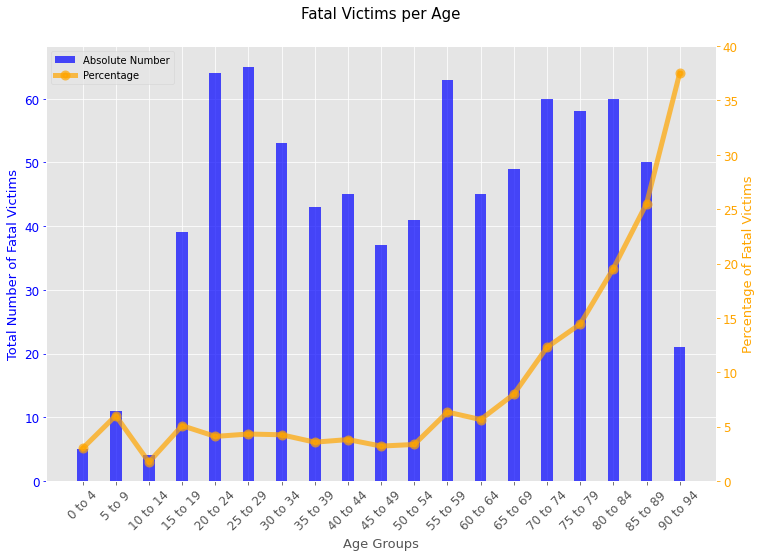

In [12]:
# Plotting
positions = list(range(len(age_fatal.index)))
width = 0.35

fix, ax1 = plt.subplots(figsize=(12,8))
grap1 = plt.bar(positions, age_fatal, 
                width, color = 'blue', alpha = 0.7, label='Absolute Number')

ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax1
grap2 = plt.plot(positions, age_relative_comp, 'g-o', linewidth=5, 
                 markeredgewidth=4, color = 'orange', alpha = 0.7, label='Percentage')

ax1.set(xlabel = "Age Groups",
       xticks = [p for p in positions], xticklabels = age_fatal.index)
ax1.tick_params(axis='x', rotation=45, labelsize=12)
ax1.tick_params(axis='y', colors='blue', labelsize=12)
ax2.tick_params(axis='y', colors='orange', labelsize=12)

plt.title("Fatal Victims per Age", y=1.05, size=15)
ax1.set_ylabel('Total Number of Fatal Victims',color='blue')
ax2.set_ylabel('Percentage of Fatal Victims', color='orange')
ax1.xaxis.label.set_size(13); ax1.yaxis.label.set_size(13); ax2.yaxis.label.set_size(13)

ax2.set_ylim([0, 40])
ax2.grid(None)

fix.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.show()

#Involved Type Analysis

In [13]:
# Filtering people involvement attribute of fatal victims
involved_fatal = fatal_victims.groupby('INVTYPE')['INJURY'].size()
involved_fatal

INVTYPE
Cyclist                  41
Driver                  150
Motorcycle Driver        73
Motorcycle Passenger      1
Passenger                89
Pedestrian              462
Truck Driver              3
Wheelchair                2
Name: INJURY, dtype: int64

##Analysis 1

In [14]:
# Distribution of involved types among fatal victims set
involved_distribution_perc = ((involved_fatal/involved_fatal.sum())*100).sort_values(ascending=False)
involved_distribution_perc

INVTYPE
Pedestrian              56.272838
Driver                  18.270402
Passenger               10.840438
Motorcycle Driver        8.891596
Cyclist                  4.993910
Truck Driver             0.365408
Wheelchair               0.243605
Motorcycle Passenger     0.121803
Name: INJURY, dtype: float64

In [15]:
# Looking at above result, we will filter only the 5 highest values + others
involved_distribution_comp = involved_fatal.sort_values(ascending=False)[:5]
result = involved_fatal.sort_values(ascending=False)[5:].sum()
involved_distribution_comp.loc['Others'] = result
involved_distribution_comp

INVTYPE
Pedestrian           462
Driver               150
Passenger             89
Motorcycle Driver     73
Cyclist               41
Others                 6
Name: INJURY, dtype: int64

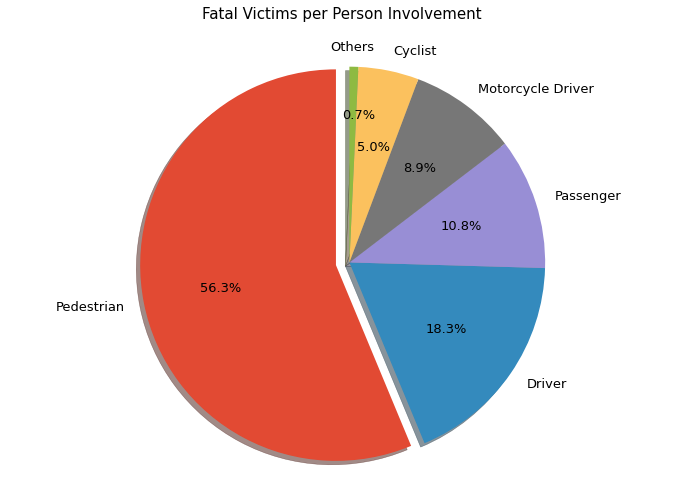

In [16]:
# Plotting
explode = (0.07, 0, 0, 0, 0, 0) 
fig1, ax1 = plt.subplots(figsize=(12,8))
patches, texts, autotexts = ax1.pie(involved_distribution_comp, explode=explode, labels=involved_distribution_comp.index.to_list(),
        autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 13})
ax1.axis('equal')

# Move a label
texts[5]._x =-0.1
autotexts[5]._x =+0.05
autotexts[5]._y =+0.75

plt.title("Fatal Victims per Person Involvement", y=1.05, size=15)
plt.show()

##Analysis 2

In [17]:
# Comparing to the total number of people involved in all collisions
involved_total = file_people.groupby('INVTYPE')['INJURY'].size()
involved_relative_comp = (100*involved_fatal/involved_total).round(2).sort_values(ascending = True)
involved_relative_comp.dropna(inplace = True) #removing those groups without fatal victims
involved_relative_comp

INVTYPE
Truck Driver             0.95
Driver                   1.97
Motorcycle Passenger     3.12
Passenger                3.50
Cyclist                  5.65
Motorcycle Driver       12.03
Wheelchair              15.38
Pedestrian              16.09
Name: INJURY, dtype: float64

In [18]:
# Reordening x-axis of fatal victim dataframe
order_x_axis = involved_relative_comp.index.to_list()
involved_fatal = involved_fatal.reindex(order_x_axis)
involved_fatal

INVTYPE
Truck Driver              3
Driver                  150
Motorcycle Passenger      1
Passenger                89
Cyclist                  41
Motorcycle Driver        73
Wheelchair                2
Pedestrian              462
Name: INJURY, dtype: int64

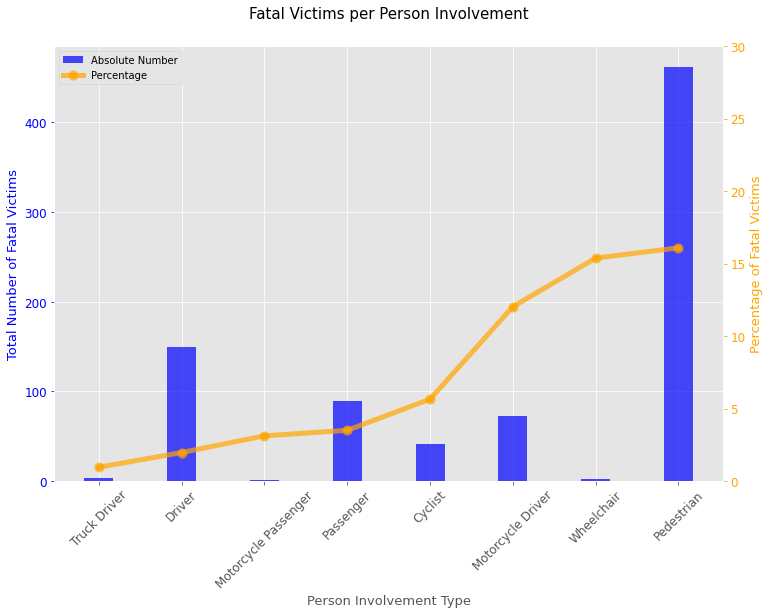

In [19]:
# Plotting
positions = list(range(len(involved_fatal.index)))
width = 0.35

fix, ax1 = plt.subplots(figsize=(12,8))
grap1 = plt.bar(positions, involved_fatal, 
                width, color = 'blue', alpha = 0.7, label='Absolute Number')

ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax1
grap2 = plt.plot(positions, involved_relative_comp, 'g-o', linewidth=5, 
                 markeredgewidth=4, color = 'orange', alpha = 0.7, label='Percentage')

ax1.set(xlabel = "Person Involvement Type",
       xticks = [p for p in positions], xticklabels = involved_fatal.index)
ax1.tick_params(axis='x', rotation=45, labelsize=12)
ax1.tick_params(axis='y', colors='blue', labelsize=12)
ax2.tick_params(axis='y', colors='orange', labelsize=12)

plt.title("Fatal Victims per Person Involvement", y=1.05, size=15)
ax1.set_ylabel('Total Number of Fatal Victims',color='blue')
ax2.set_ylabel('Percentage of Fatal Victims', color='orange')
ax1.xaxis.label.set_size(13); ax1.yaxis.label.set_size(13); ax2.yaxis.label.set_size(13)

ax2.set_ylim([0, 30])
ax2.grid(None)

fix.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.show()

#Vehicle Type Analysis

In [20]:
# Filtering vehicle type attribute of fatal victims
vehicle_fatal = fatal_victims.groupby('VEHTYPE')['INJURY'].size()
vehicle_fatal

VEHTYPE
<Null>                         330
Automobile, Station Wagon      147
Bicycle                         40
Delivery Van                     1
Motorcycle                      73
Municipal Transit Bus (TTC)      1
Other                          222
Passenger Van                    3
Pick Up Truck                    1
Truck - Open                     3
Name: INJURY, dtype: int64

In [21]:
#<Null> might mean "Not Recorded": replacing the values
vehicle_fatal.rename({'<Null>': 'Not Recorded'}, inplace = True)
vehicle_fatal

VEHTYPE
Not Recorded                   330
Automobile, Station Wagon      147
Bicycle                         40
Delivery Van                     1
Motorcycle                      73
Municipal Transit Bus (TTC)      1
Other                          222
Passenger Van                    3
Pick Up Truck                    1
Truck - Open                     3
Name: INJURY, dtype: int64

##Analysis 1

In [22]:
# Distribution of vehicle types among fatal victims set
vehicle_distribution_perc = ((vehicle_fatal / vehicle_fatal.sum())*100).sort_values(ascending=False)
vehicle_distribution_perc

VEHTYPE
Not Recorded                   40.194884
Other                          27.040195
Automobile, Station Wagon      17.904994
Motorcycle                      8.891596
Bicycle                         4.872107
Truck - Open                    0.365408
Passenger Van                   0.365408
Pick Up Truck                   0.121803
Municipal Transit Bus (TTC)     0.121803
Delivery Van                    0.121803
Name: INJURY, dtype: float64

In [23]:
# Looking at above result, we will filter only the 5 highest values + others
vehicle_distribution_comp = vehicle_fatal.sort_values(ascending=False)[:5]
result = vehicle_fatal.sort_values(ascending=False)[5:].sum()
vehicle_distribution_comp.loc['Others'] = result
vehicle_distribution_comp

VEHTYPE
Not Recorded                 330
Other                        222
Automobile, Station Wagon    147
Motorcycle                    73
Bicycle                       40
Others                         9
Name: INJURY, dtype: int64

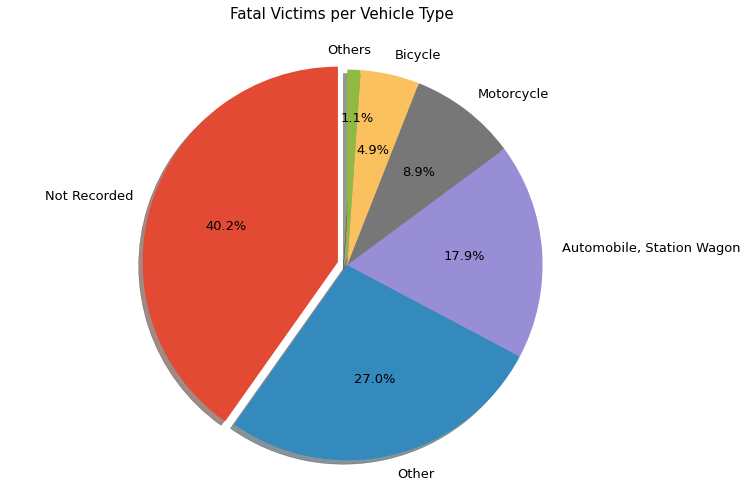

In [24]:
# Plotting
explode = (0.05, 0.0, 0, 0, 0, 0) 
fig1, ax1 = plt.subplots(figsize=(12,8))
patches, texts, autotexts = ax1.pie(vehicle_distribution_comp, explode=explode, labels=vehicle_distribution_comp.index.to_list(),
        autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 13})
ax1.axis('equal')

# Move a label
texts[5]._x =-0.1
autotexts[5]._x =+0.05
autotexts[5]._y =+0.75

plt.title("Fatal Victims per Vehicle Type",  y=1.05, size=15)
plt.show()

##Analysis 2

In [25]:
# Comparing to the total number of vehicle types in all collisions 
vehicle_total = file_people.groupby('VEHTYPE')['INJURY'].size()
vehicle_total.rename({'<Null>': 'Not Recorded'}, inplace = True)
vehicle_relative_comp = (100*vehicle_fatal/vehicle_total).round(2).sort_values(ascending = True)
vehicle_relative_comp.dropna(inplace = True) #removing those groups without fatal victims
vehicle_relative_comp

VEHTYPE
Municipal Transit Bus (TTC)     0.40
Pick Up Truck                   0.56
Delivery Van                    1.39
Truck - Open                    1.71
Automobile, Station Wagon       2.13
Passenger Van                   2.54
Other                           4.68
Bicycle                         5.54
Not Recorded                   11.73
Motorcycle                     12.01
Name: INJURY, dtype: float64

In [26]:
# Reordening x-axis of fatal victim dataframe
order_x_axis = vehicle_relative_comp.index.to_list()
vehicle_fatal = vehicle_fatal.reindex(order_x_axis)
vehicle_fatal

VEHTYPE
Municipal Transit Bus (TTC)      1
Pick Up Truck                    1
Delivery Van                     1
Truck - Open                     3
Automobile, Station Wagon      147
Passenger Van                    3
Other                          222
Bicycle                         40
Not Recorded                   330
Motorcycle                      73
Name: INJURY, dtype: int64

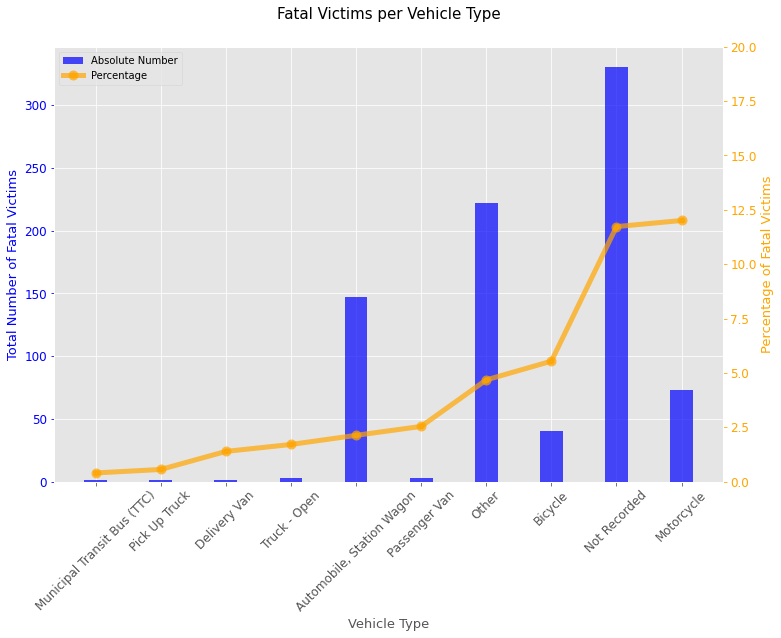

In [27]:
# Plotting
positions = list(range(len(vehicle_fatal.index)))
width = 0.35

fix, ax1 = plt.subplots(figsize=(12,8))
grap1 = plt.bar(positions, vehicle_fatal, 
                width, color = 'blue', alpha = 0.7, label='Absolute Number')

ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax1
grap2 = plt.plot(positions, vehicle_relative_comp, 'g-o', linewidth=5, 
                 markeredgewidth=4, color = 'orange', alpha = 0.7, label='Percentage')

ax1.set(xlabel = "Vehicle Type",
       xticks = [p for p in positions], xticklabels = vehicle_fatal.index)
ax1.tick_params(axis='x', rotation=45, labelsize=12)
ax1.tick_params(axis='y', colors='blue', labelsize=12)
ax2.tick_params(axis='y', colors='orange', labelsize=12)

plt.title("Fatal Victims per Vehicle Type", y=1.05, size=15)
ax1.set_ylabel('Total Number of Fatal Victims',color='blue')
ax2.set_ylabel('Percentage of Fatal Victims', color='orange')
ax1.xaxis.label.set_size(13); ax1.yaxis.label.set_size(13); ax2.yaxis.label.set_size(13)

ax2.set_ylim([0, 20])
ax2.grid(None)

fix.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.show()

#Vehicle Category Analysis

In [28]:
# Filtering vehicle category of fatal victims
vehicle_cat_fatal = fatal_victims.groupby('VEHICLE_CATEGORY')['INJURY'].size()
vehicle_cat_fatal

VEHICLE_CATEGORY
Automobile      151
Null            330
Other           227
People           40
Recreational     73
Name: INJURY, dtype: int64

##Analysis 1

In [29]:
# Distribution of vehicle categories among fatal victims set
vehicle_cat_distribution_perc = ((vehicle_cat_fatal / vehicle_cat_fatal.sum())*100).sort_values(ascending=False)
vehicle_cat_distribution_perc

VEHICLE_CATEGORY
Null            40.194884
Other           27.649208
Automobile      18.392205
Recreational     8.891596
People           4.872107
Name: INJURY, dtype: float64

In [30]:
# Looking at above result, we will not filter any category
vehicle_cat_distribution_comp = vehicle_cat_fatal.sort_values(ascending=False)
vehicle_cat_distribution_comp

VEHICLE_CATEGORY
Null            330
Other           227
Automobile      151
Recreational     73
People           40
Name: INJURY, dtype: int64

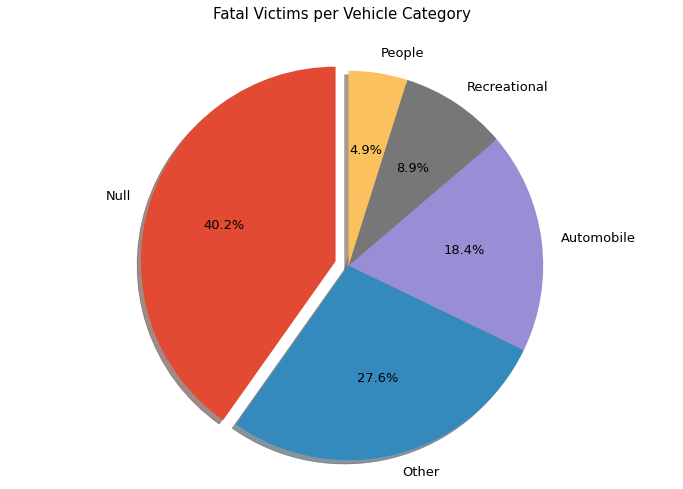

In [31]:
# Plotting
explode = (0.07, 0, 0, 0, 0) 
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(vehicle_cat_distribution_comp, explode=explode, labels=vehicle_cat_distribution_comp.index.to_list(),
        autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 13})
ax1.axis('equal')
plt.title("Fatal Victims per Vehicle Category", y=1.05, size=15)
plt.show()

##Analysis 2

In [32]:
# Comparing to the total number of people involved in all collisions
vehicle_cat_total = file_people.groupby('VEHICLE_CATEGORY')['INJURY'].size()
vehicle_cat_relative_comp = (100*vehicle_cat_fatal/vehicle_cat_total).round(2).sort_values(ascending = True)
vehicle_cat_relative_comp

VEHICLE_CATEGORY
Automobile       2.08
Other            4.19
People           5.54
Recreational    11.57
Null            11.73
Name: INJURY, dtype: float64

In [33]:
# Reordening x-axis of fatal victim dataframe
order_x_axis = vehicle_cat_relative_comp.index.to_list()
vehicle_cat_fatal = vehicle_cat_fatal.reindex(order_x_axis)
vehicle_cat_fatal

VEHICLE_CATEGORY
Automobile      151
Other           227
People           40
Recreational     73
Null            330
Name: INJURY, dtype: int64

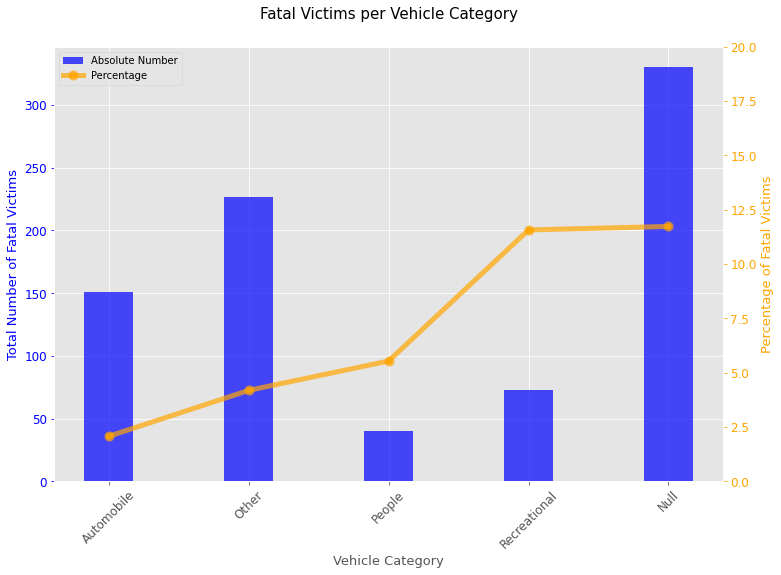

In [34]:
# Plotting
positions = list(range(len(vehicle_cat_fatal.index)))
width = 0.35

fix, ax1 = plt.subplots(figsize=(12,8))
grap1 = plt.bar(positions, vehicle_cat_fatal, 
                width, color = 'blue', alpha = 0.7, label='Absolute Number')

ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax1
grap2 = plt.plot(positions, vehicle_cat_relative_comp, 'g-o', linewidth=5, 
                 markeredgewidth=4, color = 'orange', alpha = 0.7, label='Percentage')

ax1.set(xlabel = "Vehicle Category",
       xticks = [p for p in positions], xticklabels = vehicle_cat_fatal.index)
ax1.tick_params(axis='x', rotation=45, labelsize=12)
ax1.tick_params(axis='y', colors='blue', labelsize=12)
ax2.tick_params(axis='y', colors='orange', labelsize=12)

plt.title("Fatal Victims per Vehicle Category", y=1.05, size=15)
ax1.set_ylabel('Total Number of Fatal Victims',color='blue')
ax2.set_ylabel('Percentage of Fatal Victims', color='orange')
ax1.xaxis.label.set_size(13); ax1.yaxis.label.set_size(13); ax2.yaxis.label.set_size(13)

ax2.set_ylim([0, 20])
ax2.grid(None)

fix.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.show()

#Hour of Day

In [35]:
# Filtering hour interval attribute of fatal victims
hour_fatal = fatal_victims.groupby('HOUR_INTERVAL')['INJURY'].size()
hour_fatal

HOUR_INTERVAL
00:00 to 00:59    34
01:00 to 01:59    23
02:00 to 02:59    26
03:00 to 03:59    21
04:00 to 04:59    10
05:00 to 05:59    27
06:00 to 06:59    34
07:00 to 07:59    27
08:00 to 08:59    26
09:00 to 09:59    43
10:00 to 10:59    38
11:00 to 11:59    34
12:00 to 12:59    38
13:00 to 13:59    32
14:00 to 14:59    44
15:00 to 15:59    33
16:00 to 16:59    39
17:00 to 17:59    41
18:00 to 18:59    60
19:00 to 19:59    34
20:00 to 20:59    52
21:00 to 21:59    44
22:00 to 22:59    29
23:00 to 23:59    32
Name: INJURY, dtype: int64

##Analysis 1

In [36]:
# Distribution of hour intervals among fatal victims set
hour_distribution_perc = ((hour_fatal / hour_fatal.sum())*100).sort_values(ascending=False)
hour_distribution_perc

HOUR_INTERVAL
18:00 to 18:59    7.308161
20:00 to 20:59    6.333739
21:00 to 21:59    5.359318
14:00 to 14:59    5.359318
09:00 to 09:59    5.237515
17:00 to 17:59    4.993910
16:00 to 16:59    4.750305
12:00 to 12:59    4.628502
10:00 to 10:59    4.628502
11:00 to 11:59    4.141291
06:00 to 06:59    4.141291
00:00 to 00:59    4.141291
19:00 to 19:59    4.141291
15:00 to 15:59    4.019488
13:00 to 13:59    3.897686
23:00 to 23:59    3.897686
22:00 to 22:59    3.532278
07:00 to 07:59    3.288672
05:00 to 05:59    3.288672
08:00 to 08:59    3.166870
02:00 to 02:59    3.166870
01:00 to 01:59    2.801462
03:00 to 03:59    2.557856
04:00 to 04:59    1.218027
Name: INJURY, dtype: float64

In [37]:
# Looking at above result, we will filter only the 10 highest values + others
hour_distribution_comp = hour_fatal.sort_values(ascending=False)[:10]
result = hour_fatal.sort_values(ascending=False)[10:].sum()
hour_distribution_comp.loc['Others'] = result
hour_distribution_comp

HOUR_INTERVAL
18:00 to 18:59     60
20:00 to 20:59     52
21:00 to 21:59     44
14:00 to 14:59     44
09:00 to 09:59     43
17:00 to 17:59     41
16:00 to 16:59     39
12:00 to 12:59     38
10:00 to 10:59     38
11:00 to 11:59     34
Others            388
Name: INJURY, dtype: int64

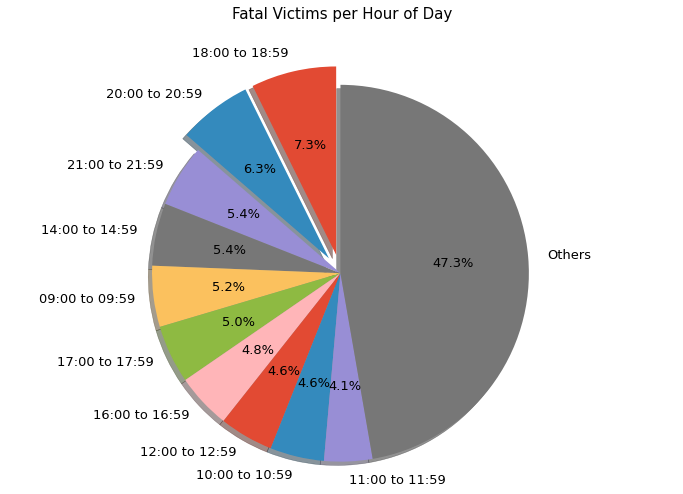

In [38]:
# Plotting
explode = (0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0) 
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(hour_distribution_comp, explode=explode, labels=hour_distribution_comp.index.to_list(),
        autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 13})
ax1.axis('equal')
plt.title("Fatal Victims per Hour of Day", y=1.05, size=15)
plt.show()

##Analysis 2

In [39]:
# Comparing to the total number of people involved in all collisions
hour_total = file_people.groupby('HOUR_INTERVAL')['INJURY'].size()
hour_relative_comp = (100*hour_fatal/hour_total).round(2)
hour_relative_comp

HOUR_INTERVAL
00:00 to 00:59    6.10
01:00 to 01:59    5.64
02:00 to 02:59    5.59
03:00 to 03:59    4.99
04:00 to 04:59    5.81
05:00 to 05:59    9.44
06:00 to 06:59    6.64
07:00 to 07:59    4.97
08:00 to 08:59    3.89
09:00 to 09:59    6.27
10:00 to 10:59    5.26
11:00 to 11:59    4.76
12:00 to 12:59    5.13
13:00 to 13:59    3.74
14:00 to 14:59    4.72
15:00 to 15:59    3.30
16:00 to 16:59    3.96
17:00 to 17:59    3.74
18:00 to 18:59    5.28
19:00 to 19:59    3.62
20:00 to 20:59    5.64
21:00 to 21:59    5.21
22:00 to 22:59    4.17
23:00 to 23:59    5.75
Name: INJURY, dtype: float64

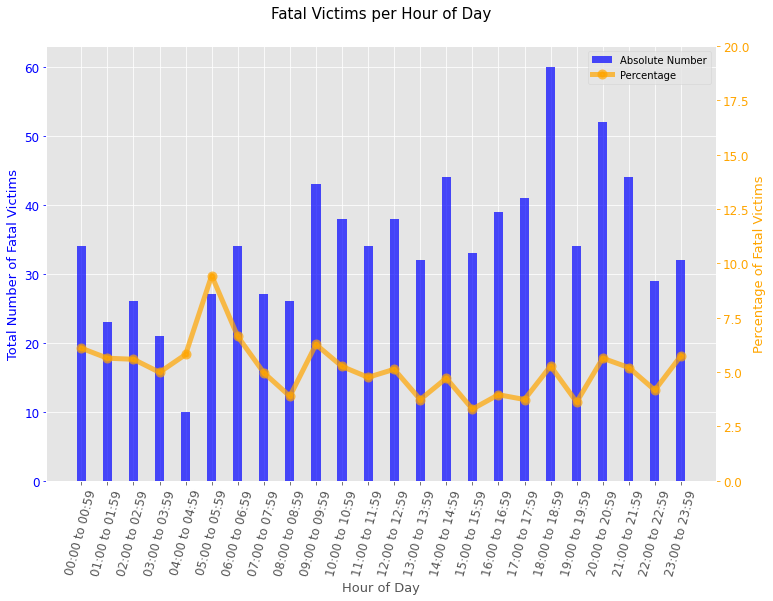

In [40]:
# Plotting
positions = list(range(len(hour_fatal.index)))
width = 0.35

fix, ax1 = plt.subplots(figsize=(12,8))
grap1 = plt.bar(positions, hour_fatal, 
                width, color = 'blue', alpha = 0.7, label='Absolute Number')

ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax1
grap2 = plt.plot(positions, hour_relative_comp, 'g-o', linewidth=5, 
                 markeredgewidth=4, color = 'orange', alpha = 0.7, label='Percentage')

ax1.set(xlabel = "Hour of Day",
       xticks = [p for p in positions], xticklabels = hour_fatal.index)
ax1.tick_params(axis='x', rotation=75, labelsize=12)
ax1.tick_params(axis='y', colors='blue', labelsize=12)
ax2.tick_params(axis='y', colors='orange', labelsize=12)

plt.title("Fatal Victims per Hour of Day", y=1.05, size=15)
ax1.set_ylabel('Total Number of Fatal Victims',color='blue')
ax2.set_ylabel('Percentage of Fatal Victims', color='orange')
ax1.xaxis.label.set_size(13); ax1.yaxis.label.set_size(13); ax2.yaxis.label.set_size(13)

ax2.set_ylim([0, 20])
ax2.grid(None)

fix.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

In [41]:
# Interestangly there is a high percentage of deaths between 05:00 and 05:59. 
# We can chech whether there is a relationship with day of week, counting the 
# quantity of fatalities per day.
fatal_victims[['HOUR_INTERVAL','DAY_NAME']].value_counts().loc['05:00 to 05:59']

DAY_NAME
Friday      7
Monday      6
Tuesday     6
Thursday    3
Saturday    3
Sunday      2
dtype: int64

In [42]:
# Checking now whether there is a relationship with early jogging people (pedestrians)
fatal_victims[['HOUR_INTERVAL','INVTYPE']].value_counts().loc['05:00 to 05:59']

INVTYPE
Pedestrian           10
Driver               10
Passenger             3
Truck Driver          2
Cyclist               1
Motorcycle Driver     1
dtype: int64

In [43]:
# Finally, let's chech the alcohol influence
fatal_victims[['HOUR_INTERVAL','ALCOHOL']].value_counts().loc['05:00 to 05:59']

ALCOHOL
<Null>    27
dtype: int64

#Day of Week

In [44]:
# Filtering day name attribute of fatal victims set
day_name_fatal = fatal_victims.groupby('DAY_NAME')['INJURY'].size()
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_name_fatal = day_name_fatal.reindex(day_order)
day_name_fatal

DAY_NAME
Monday        93
Tuesday      138
Wednesday    114
Thursday     124
Friday       143
Saturday     113
Sunday        96
Name: INJURY, dtype: int64

##Analysis 1

In [45]:
# Distribution of days of week among fatalities victims set
day_name_distribution_perc = ((day_name_fatal / day_name_fatal.sum())*100).sort_values(ascending=False)
day_name_distribution_perc

DAY_NAME
Friday       17.417783
Tuesday      16.808770
Thursday     15.103532
Wednesday    13.885505
Saturday     13.763703
Sunday       11.693057
Monday       11.327649
Name: INJURY, dtype: float64

In [46]:
# Looking at above result, we will not filter any category
day_name_distribution_comp = day_name_fatal.sort_values(ascending=False)
day_name_distribution_comp

DAY_NAME
Friday       143
Tuesday      138
Thursday     124
Wednesday    114
Saturday     113
Sunday        96
Monday        93
Name: INJURY, dtype: int64

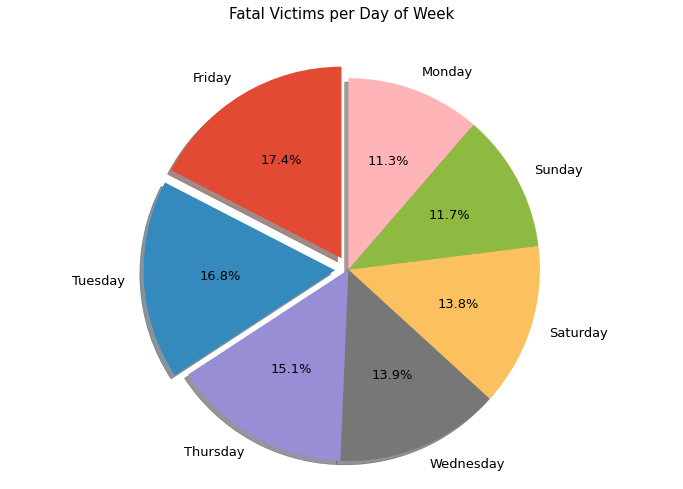

In [47]:
# Plotting
explode = (0.07, 0.07, 0, 0, 0, 0, 0) 
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(day_name_distribution_comp, explode=explode, labels=day_name_distribution_comp.index.to_list(),
        autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 13})
ax1.axis('equal')
plt.title("Fatal Victims per Day of Week", y=1.05, size=15)
plt.show()

##Analysis 2

In [48]:
# Comparing to the total number of people involved in all collisions
day_name_total = file_people.groupby('DAY_NAME')['INJURY'].size()
day_name_relative_comp = (100*day_name_fatal/day_name_total).round(2)
day_name_relative_comp = day_name_relative_comp.reindex(day_order)
day_name_relative_comp

DAY_NAME
Monday       4.10
Tuesday      5.53
Wednesday    4.74
Thursday     5.32
Friday       5.20
Saturday     4.89
Sunday       4.17
Name: INJURY, dtype: float64

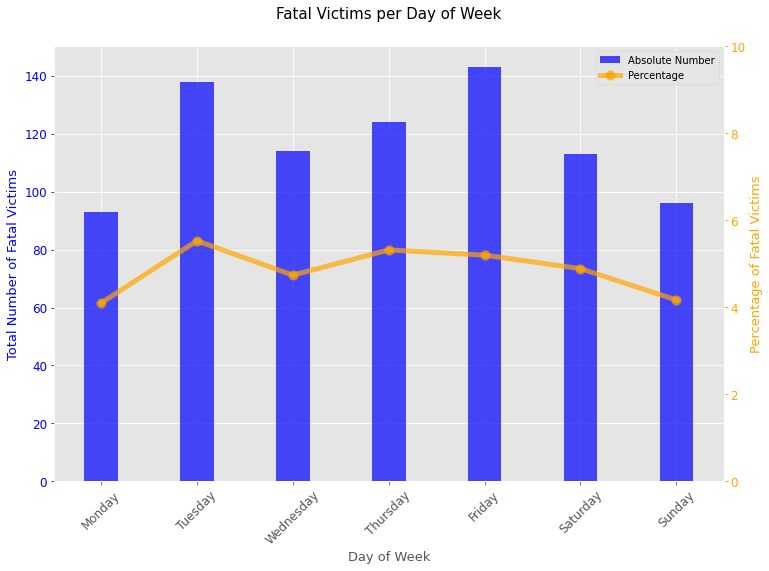

In [49]:
# Plotting
positions = list(range(len(day_name_fatal.index)))
width = 0.35

fix, ax1 = plt.subplots(figsize=(12,8))
grap1 = plt.bar(positions, day_name_fatal, 
                width, color = 'blue', alpha = 0.7, label='Absolute Number')

ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax1
grap2 = plt.plot(positions, day_name_relative_comp, 'g-o', linewidth=5, 
                 markeredgewidth=4, color = 'orange', alpha = 0.7, label='Percentage')

ax1.set(xlabel = "Day of Week",
       xticks = [p for p in positions], xticklabels = day_name_fatal.index)
ax1.tick_params(axis='x', rotation=45, labelsize=12)
ax1.tick_params(axis='y', colors='blue', labelsize=12)
ax2.tick_params(axis='y', colors='orange', labelsize=12)

plt.title("Fatal Victims per Day of Week", y=1.05, size=15)
ax1.set_ylabel('Total Number of Fatal Victims',color='blue')
ax2.set_ylabel('Percentage of Fatal Victims', color='orange')
ax1.xaxis.label.set_size(13); ax1.yaxis.label.set_size(13); ax2.yaxis.label.set_size(13)

ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='orange')

ax2.set_ylim([0, 10])
ax2.grid(None)

fix.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

#Month

In [50]:
# Filtering month name attribute of fatal victims
month_name_fatal = fatal_victims.groupby('MONTH_NAME')['INJURY'].size()
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
month_name_fatal = month_name_fatal.reindex(month_order)
month_name_fatal

MONTH_NAME
January      80
February     45
March        56
April        52
May          59
June         64
July         76
August       80
September    89
October      75
November     76
December     69
Name: INJURY, dtype: int64

##Analysis 1

In [51]:
# Distribution of months among fatal victims set
month_name_distribution_perc = ((month_name_fatal / month_name_fatal.sum())*100).sort_values(ascending=False)
month_name_distribution_perc

MONTH_NAME
September    10.840438
August        9.744214
January       9.744214
November      9.257004
July          9.257004
October       9.135201
December      8.404385
June          7.795371
May           7.186358
March         6.820950
April         6.333739
February      5.481121
Name: INJURY, dtype: float64

In [52]:
# Looking at above result, we will filter only the 6 highest values + others
month_name_distribution_comp = month_name_fatal.sort_values(ascending=False)[:6]
result = month_name_fatal.sort_values(ascending=False)[6:].sum()
month_name_distribution_comp.loc['Others'] = result
month_name_distribution_comp

MONTH_NAME
September     89
August        80
January       80
November      76
July          76
October       75
Others       345
Name: INJURY, dtype: int64

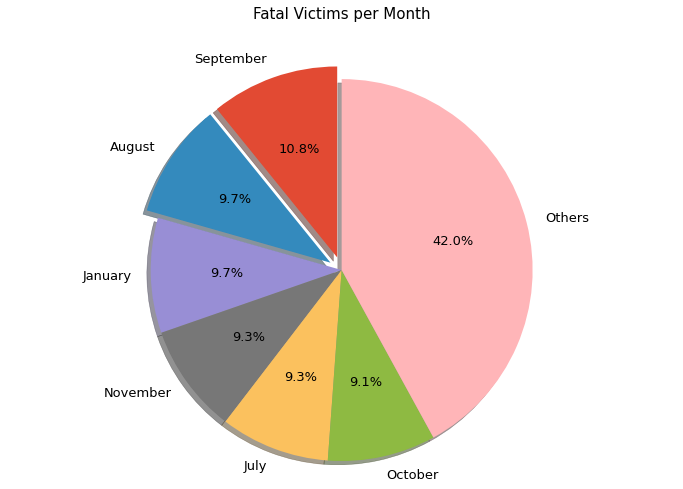

In [53]:
# Plotting
explode = (0.07, 0.07, 0, 0, 0, 0, 0) 
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(month_name_distribution_comp, explode=explode, labels=month_name_distribution_comp.index.to_list(),
        autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 13})
ax1.axis('equal')
plt.title("Fatal Victims per Month", y=1.05, size=15)
plt.show()

##Analysis 2

In [54]:
# Comparing to the total number of people involved in all collisions
month_name_total = file_people.groupby('MONTH_NAME')['INJURY'].size()
month_name_relative_comp = (100*month_name_fatal/month_name_total).round(2)
month_name_relative_comp = month_name_relative_comp.reindex(month_order)
month_name_relative_comp

MONTH_NAME
January      6.64
February     4.33
March        4.81
April        4.42
May          4.15
June         3.82
July         4.92
August       4.67
September    5.46
October      4.66
November     5.40
December     5.42
Name: INJURY, dtype: float64

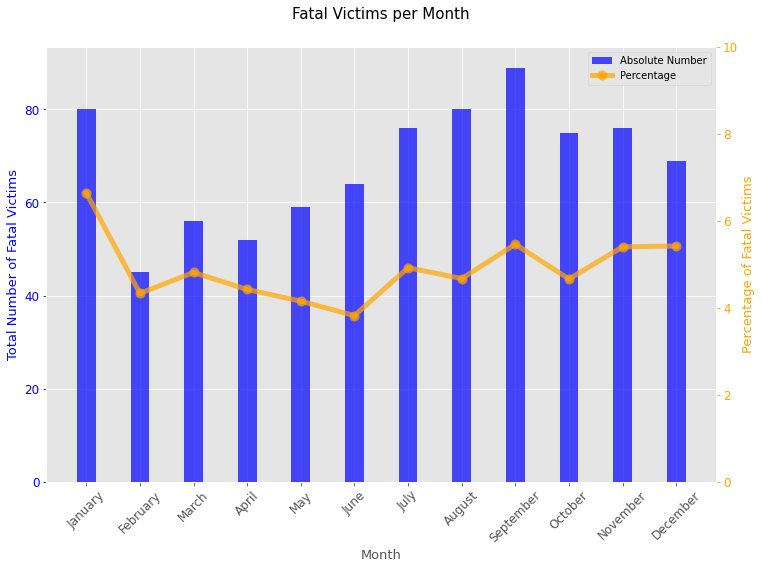

In [55]:
# Plotting
positions = list(range(len(month_name_fatal.index)))
width = 0.35

fix, ax1 = plt.subplots(figsize=(12,8))
grap1 = plt.bar(positions, month_name_fatal, 
                width, color = 'blue', alpha = 0.7, label='Absolute Number')

ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax1
grap2 = plt.plot(positions, month_name_relative_comp, 'g-o', linewidth=5, 
                 markeredgewidth=4, color = 'orange', alpha = 0.7, label='Percentage')

ax1.set(xlabel = "Month",
       xticks = [p for p in positions], xticklabels = month_name_fatal.index)
ax1.tick_params(axis='x', rotation=45, labelsize=12)
ax1.tick_params(axis='y', colors='blue', labelsize=12)
ax2.tick_params(axis='y', colors='orange', labelsize=12)

plt.title("Fatal Victims per Month", y=1.05, size=15)
ax1.set_ylabel('Total Number of Fatal Victims',color='blue')
ax2.set_ylabel('Percentage of Fatal Victims', color='orange')
ax1.xaxis.label.set_size(13); ax1.yaxis.label.set_size(13); ax2.yaxis.label.set_size(13)

ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='orange')

ax2.set_ylim([0, 10])
ax2.grid(None)

fix.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

#Season

In [56]:
# Filtering season attribute of fatal victims
season_fatal = fatal_victims.groupby('SEASON')['INJURY'].size()
season_order = ['Winter','Spring','Summer','Autumn']
season_fatal = season_fatal.reindex(season_order)
season_fatal

SEASON
Winter    182
Spring    179
Summer    232
Autumn    228
Name: INJURY, dtype: int64

##Analysis 1

In [57]:
# Distribution of fatalities among seasons
season_distribution_perc = ((season_fatal / season_fatal.sum())*100).sort_values(ascending=False)
season_distribution_perc

SEASON
Summer    28.258222
Autumn    27.771011
Winter    22.168088
Spring    21.802680
Name: INJURY, dtype: float64

In [58]:
# Looking at above result, we will not filter any category
season_distribution_comp = season_fatal.sort_values(ascending=False)
season_distribution_comp

SEASON
Summer    232
Autumn    228
Winter    182
Spring    179
Name: INJURY, dtype: int64

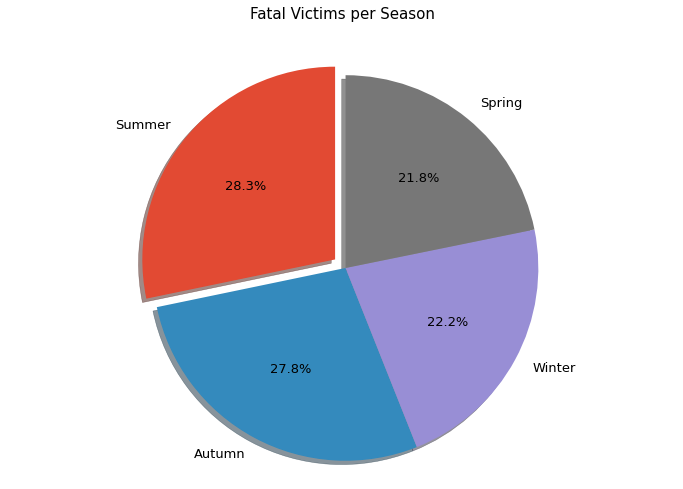

In [59]:
# Plotting
explode = (0.07, 0, 0, 0) 
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(season_distribution_comp, explode=explode, labels=season_distribution_comp.index.to_list(),
        autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 13})
ax1.axis('equal')
plt.title("Fatal Victims per Season", y=1.05, size=15)
plt.show()

##Analysis 2

In [60]:
# Comparing to the total number of people involved in all collisions
season_total = file_people.groupby('SEASON')['INJURY'].size()
season_relative_comp = (100*season_fatal/season_total).round(2).sort_values(ascending = False)
season_relative_comp = season_relative_comp.reindex(season_order)
season_relative_comp

SEASON
Winter    5.25
Spring    4.40
Summer    4.68
Autumn    5.22
Name: INJURY, dtype: float64

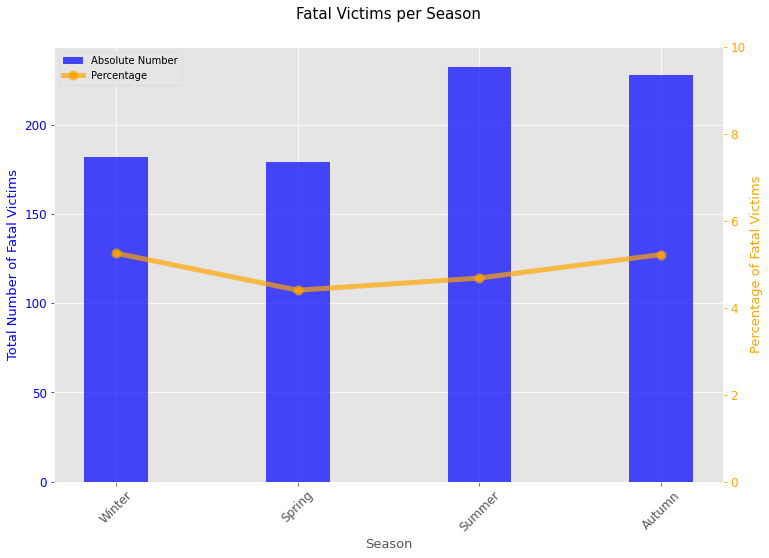

In [61]:
# Plotting
positions = list(range(len(season_fatal.index)))
width = 0.35

fix, ax1 = plt.subplots(figsize=(12,8))
grap1 = plt.bar(positions, season_fatal, 
                width, color = 'blue', alpha = 0.7, label='Absolute Number')

ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax1
grap2 = plt.plot(positions, season_relative_comp, 'g-o', linewidth=5, 
                 markeredgewidth=4, color = 'orange', alpha = 0.7, label='Percentage')

ax1.set(xlabel = "Season",
       xticks = [p for p in positions], xticklabels = season_fatal.index)
ax1.tick_params(axis='x', rotation=45, labelsize=12)
ax1.tick_params(axis='y', colors='blue', labelsize=12)
ax2.tick_params(axis='y', colors='orange', labelsize=12)

plt.title("Fatal Victims per Season", y=1.05, size=15)
ax1.set_ylabel('Total Number of Fatal Victims',color='blue')
ax2.set_ylabel('Percentage of Fatal Victims', color='orange')
ax1.xaxis.label.set_size(13); ax1.yaxis.label.set_size(13); ax2.yaxis.label.set_size(13)

ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='orange')

ax2.set_ylim([0, 10])
ax2.grid(None)

fix.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.show()

#Year

In [62]:
# Filtering year attribute of fatal victims
year_fatal = fatal_victims.groupby('YEAR')['INJURY'].size()
year_fatal

YEAR
2006    57
2007    51
2008    54
2009    48
2010    43
2011    34
2012    44
2013    63
2014    51
2015    65
2016    78
2017    63
2018    66
2019    64
2020    40
Name: INJURY, dtype: int64

##Analysis 1

In [63]:
# Distribution of years among fatal victims set
year_distribution_perc = ((year_fatal / year_fatal.sum())*100).sort_values(ascending=False)
year_distribution_perc

YEAR
2016    9.500609
2018    8.038977
2015    7.917174
2019    7.795371
2017    7.673569
2013    7.673569
2006    6.942753
2008    6.577345
2014    6.211937
2007    6.211937
2009    5.846529
2012    5.359318
2010    5.237515
2020    4.872107
2011    4.141291
Name: INJURY, dtype: float64

In [64]:
# Looking at above result, we will filter only the 9 highest values + others
year_distribution_comp = year_fatal.sort_values(ascending=False)[:9]
result = year_fatal.sort_values(ascending=False)[9:].sum()
year_distribution_comp.loc['Others'] = result
year_distribution_comp

YEAR
2016       78
2018       66
2015       65
2019       64
2017       63
2013       63
2006       57
2008       54
2014       51
Others    260
Name: INJURY, dtype: int64

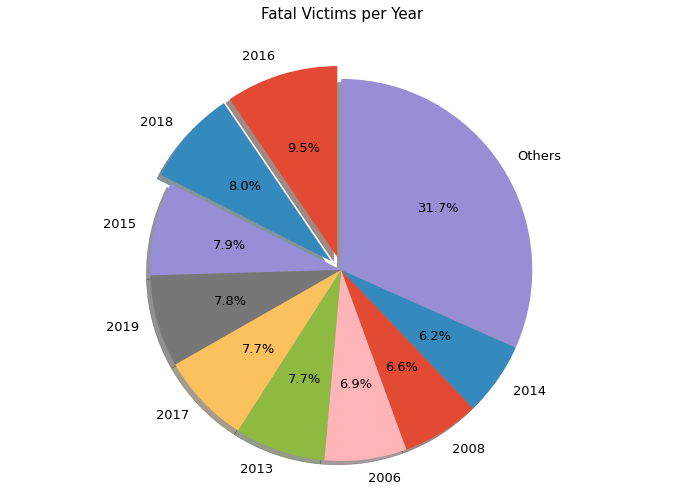

In [65]:
# Plotting
explode = (0.07, 0.07, 0, 0, 0, 0, 0, 0, 0, 0) 
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(year_distribution_comp, explode=explode, labels=year_distribution_comp.index.to_list(),
        autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 13})
ax1.axis('equal')
plt.title("Fatal Victims per Year", y=1.05, size=15)
plt.show()

##Analysis 2

In [66]:
# Comparing to the total number of people involved in all collisions
year_total = file_people.groupby('YEAR')['INJURY'].size()
year_relative_comp = (100*year_fatal/year_total).round(2)
year_relative_comp

YEAR
2006    3.84
2007    3.46
2008    4.36
2009    3.86
2010    3.61
2011    2.88
2012    3.26
2013    5.11
2014    5.57
2015    7.00
2016    7.75
2017    6.43
2018    6.15
2019    6.84
2020    6.32
Name: INJURY, dtype: float64

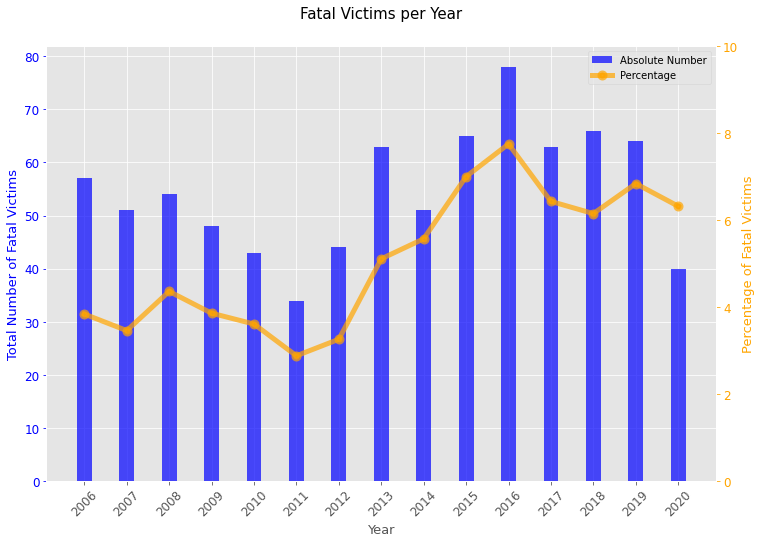

In [67]:
# Plotting
positions = list(range(len(year_fatal.index)))
width = 0.35

fix, ax1 = plt.subplots(figsize=(12,8))
grap1 = plt.bar(positions, year_fatal, 
                width, color = 'blue', alpha = 0.7, label='Absolute Number')

ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax1
grap2 = plt.plot(positions, year_relative_comp, 'g-o', linewidth=5, 
                 markeredgewidth=4, color = 'orange', alpha = 0.7, label='Percentage')

ax1.set(xlabel = "Year",
       xticks = [p for p in positions], xticklabels = year_fatal.index)
ax1.tick_params(axis='x', rotation=45, labelsize=12)
ax1.tick_params(axis='y', colors='blue', labelsize=12)
ax2.tick_params(axis='y', colors='orange', labelsize=12)

plt.title("Fatal Victims per Year", y=1.05, size=15)
ax1.set_ylabel('Total Number of Fatal Victims',color='blue')
ax2.set_ylabel('Percentage of Fatal Victims', color='orange')
ax1.xaxis.label.set_size(13); ax1.yaxis.label.set_size(13); ax2.yaxis.label.set_size(13)

ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='orange')

ax2.set_ylim([0, 10])
ax2.grid(None)

fix.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

Open Government Licence – Ontario

You are encouraged to use the Information that is available under this licence with only a few conditions.

Using Information under this licence

Use of any Information indicates your acceptance of the terms below.
The Information Provider grants you a worldwide, royalty-free, perpetual, non-exclusive licence to use the Information, including for commercial purposes, subject to the terms below.
You are free to:

Copy, modify, publish, translate, adapt, distribute or otherwise use the Information in any medium, mode or format for any lawful purpose.
You must, where you do any of the above:

Acknowledge the source of the Information by including any attribution statement specified by the Information Provider(s) and, where possible, provide a link to this licence.
If the Information Provider does not provide a specific attribution statement, or if you are using Information from several Information Providers and multiple attributions are not practical for your product or application, you must use the following attribution statement:

Contains information licensed under the Open Government Licence – Ontario.

The terms of this licence are important, and if you fail to comply with any of them, the rights granted to you under this licence, or any similar licence granted by the Information Provider, will end automatically.
Exemptions

This licence does not grant you any right to use:
Personal Information;
Information or Records not accessible under the Freedom of Information and Protection of Privacy Act (Ontario);
third party rights the Information Provider is not authorized to license;
the names, crests, logos, or other official symbols of the Information Provider; and
Information subject to other intellectual property rights, including patents, trade-marks and official marks.
Non-endorsement

This licence does not grant you any right to use the Information in a way that suggests any official status or that the Information Provider endorses you or your use of the Information.
No warranty

The Information is licensed "as is", and the Information Provider excludes all representations, warranties, obligations, and liabilities, whether express or implied, to the maximum extent permitted by law.
The Information Provider is not liable for any errors or omissions in the Information, and will not under any circumstances be liable for any direct, indirect, special, incidental, consequential, or other loss, injury or damage caused by its use or otherwise arising in connection with this licence or the Information, even if specifically advised of the possibility of such loss, injury or damage.
Governing Law

This licence is governed by the laws of the Province of Ontario and the applicable laws of Canada. 
Legal proceedings related to this licence may only be brought in the courts of Ontario.
Definitions

In this licence, the terms below have the following meanings:
"Information"

means information resources or Records protected by copyright or other information or Records that are offered for use under the terms of this licence.

"Information Provider"

means Her Majesty the Queen in right of Ontario.

"Personal Information"

has the meaning set out in section 2(1) of Freedom of Information and Protection of Privacy Act (Ontario).

"Records"

has the meaning of "record" as set out in the Freedom of Information and Protection of Privacy Act (Ontario).

"You"

means the natural or legal person, or body of persons corporate or incorporate, acquiring rights under this licence.

Versioning

This is version 1.0 of the Open Government Licence – Ontario. The Information Provider may make changes to the terms of this licence from time to time and issue a new version of the licence. Your use of the Information will be governed by the terms of the licence in force as of the date you accessed the information.
Updated: September 14, 2016

Published: June 18, 2013